In [1]:
import numpy as np
import cv2
import random
import pandas as pd
import time


import matplotlib.pyplot as plt
from seaborn import load_dataset

In [2]:
path= '/home/miguelpc/Block-matching-GitHub/'
pathReferencia ='Imagenes Originales Gris/F-16_gray.png'
pathRuido='F-16/F-16_gray_512_512_variance_25.png'
imagenReferencia = cv2.imread(path+pathReferencia)
imagenReferenciaGris = cv2.cvtColor(imagenReferencia, cv2.COLOR_RGB2GRAY)
imagenRuido = cv2.imread(path+pathRuido)
imagenRuidoGris = cv2.cvtColor(imagenRuido, cv2.COLOR_RGB2GRAY)
areaBusqueda = 21
tamañoParche = 8
split_punto = pathRuido.split(".")
split_guion = split_punto[0].split("_")
varianzaOriginal = int(split_guion[len(split_guion)-1])

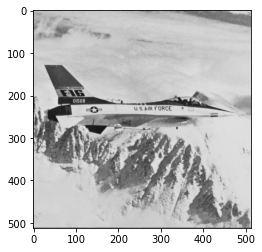

In [3]:
plt.imshow(cv2.cvtColor(imagenReferenciaGris, cv2.COLOR_BGR2RGB))
plt.show()

# Algoritmo de búsqueda exhaustiva

In [5]:
# imgAct: Imagen actual puede ser ruidosa (imagen de la cual se adquiere la plantilla)
# areaBus: Área de búsqueda 
# tamParche: tamaño del parche (parche dentro del área de búsqueda)

def algoritmoBusquedaExhaustiva(posicionAltoImagenActual,posicionAnchoImagenActual,imgAct,imgRuido,areaBus,tamParche):   
    
    imagenActual = imgAct[posicionAltoImagenActual:posicionAltoImagenActual+tamParche, posicionAnchoImagenActual: posicionAnchoImagenActual+tamParche]
    
    dh1 = pd.DataFrame(columns=['ssd', 'coordenada_x', 'coordenada_y'])
    inicio = time.time()
    for m in range(posicionAltoImagenActual,posicionAltoImagenActual+areaBus-tamParche+1):
        for n in range(posicionAnchoImagenActual,posicionAnchoImagenActual+areaBus-tamParche+1):
            imagenReferencia = imgRuido[m:m+tamParche, n: n+tamParche]
            ssd=0
            for rx_Pache in range (0,tamParche):
                for ry_Pache in range (0,tamParche):
                    resta = int(imagenActual[rx_Pache,ry_Pache])-int(imagenReferencia[rx_Pache,ry_Pache])
                    ssd += resta**2
#                     ssd += np.sum(np.power((imagenActual[rx_Pache,ry_Pache]-imagenReferencia[rx_Pache,ry_Pache]),2))
            dh1 = dh1.append({'ssd': ssd, 'coordenada_x':m, 'coordenada_y':n}, ignore_index=True)
#     print(posicionAltoImagenActual,posicionAnchoImagenActual)
    fin = time.time()
#     print(fin-inicio)
    by_ssd = dh1.sort_values('ssd',ascending=True)
    by_ssd = by_ssd.reset_index(drop=True)
#     by_ssd.head()
    posicionAltoImagenReferencia = by_ssd['coordenada_x'][0]
    posicionAnchoImagenReferencia = by_ssd['coordenada_y'][0]
    
#     print(by_ssd)
    return posicionAltoImagenReferencia,posicionAnchoImagenReferencia
    
        
    

In [6]:
posicionAltoImagenReferencia,posicionAnchoImagenReferencia = algoritmoBusquedaExhaustiva(210,210,imagenReferenciaGris,imagenRuidoGris,areaBusqueda,tamañoParche)

# plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
# plt.show()
# print(imagen)
# cv2.imwrite('8x8.png', imagen)

In [7]:
pxy_pref_ABE = pd.DataFrame(columns=['coordenada_x', 'coordenada_y','referencia_x','referencia_y',])
altoImagen = imagenReferenciaGris.shape[0]
anchoImagen = imagenReferenciaGris.shape[1]

for posicionAlto in range(0,altoImagen-areaBusqueda): # altoImagen-areaBusqueda
    for posicionAncho in range(0,anchoImagen-areaBusqueda): # anchoImagen-areaBusqueda
        posicionAltoImagenRefer encia,posicionAnchoImagenReferencia = algoritmoBusquedaExhaustiva(posicionAlto,posicionAncho,imagenReferenciaGris,imagenRuidoGris,areaBusqueda,tamañoParche)
        pxy_pref_ABE = pxy_pref_ABE.append({'coordenada_x': posicionAlto, 'coordenada_y':posicionAncho, 'referencia_x':posicionAltoImagenReferencia,'referencia_y':posicionAnchoImagenReferencia}, ignore_index=True)
    
    
        
pxy_pref_ABE

,coordenada_x,coordenada_y,referencia_x,referencia_y
0,0,0,0,0
1,0,1,0,1
2,0,2,0,2
3,0,3,0,3
4,0,4,0,4
...,...,...,...,...
241076,490,486,490,486
241077,490,487,490,487
241078,490,488,490,488
241079,490,489,490,489


In [8]:
suma = 0
miu = 0
for i in range(0,len(pxy_pref_ABE)-1):
    if pxy_pref_ABE['coordenada_x'][i] == pxy_pref_ABE['referencia_x'][i] and pxy_pref_ABE['coordenada_y'][i] == pxy_pref_ABE['referencia_y'][i]:
        suma += 1

miu =  suma/(len(pxy_pref_ABE)-1)
miu
    

0.8577567612410818

Sin filtro
# Efectivo/lena_gray_512_512_variance_25_Efectivo
0.41876970300315247
# Efectivo/lena_gray_512_512_variance_100_Efectivo.png
0.3920565787290526
# Efectivo/lena_gray_512_512_variance_225_Efectivo.png
0.35327692052430726
# Efectivo/lena_gray_512_512_variance_400_Efectivo.png
0.31881533101045295

# Baboon/Baboon_gray_512_512_variance_25.png:
0.91674962667994

# Baboon/Baboon_gray_512_512_variance_100.png

# Baboon/Baboon_gray_512_512_variance_225.png

# Baboon/Baboon_gray_512_512_variance_400.png
0.409610917537747


# lena/lena_gray_512_512_variance_25.png:
0.32918118466898955
# lena/lena_gray_512_512_variance_100.png:
0.22643106022896964
# lena/lena_gray_512_512_variance_225.png:
0.15557076489132238
# lena/lena_gray_512_512_variance_400.png:
0.11053592168574747

Posteriormente hay que hacer una segunda fase, para el ABJ hay que calcular la distancia euclideana para los primeros 8 parches para el de algoritmoBJTCD hay que hacer rw=5 de los 8 primeros.

# Algoritmo de Búsqueda Jerárquica

In [12]:
def algoritmoBusquedaJerarquica(posicionAltoImagenActual,posicionAnchoImagenActual,imgAct,imgRuido,areaBus,tamParche):   
#     imgActBlur = cv2.GaussianBlur(imgAct,(5,5),0)  
    imagenActual = imgAct[posicionAltoImagenActual:posicionAltoImagenActual+tamParche, posicionAnchoImagenActual: posicionAnchoImagenActual+tamParche]
    imagenActualBlur = cv2.GaussianBlur(imagenActual,(3,3),0) # Esta parte se inserta dado que el artículo dice que se agrega un filtro suavizado

    dh1 = pd.DataFrame(columns=['ssd', 'coordenada_x', 'coordenada_y'])
    tiempo_Extra = 0
    inicio = time.time()
    for m in range(posicionAltoImagenActual,posicionAltoImagenActual+areaBus-tamParche+1):
        for n in range(posicionAnchoImagenActual,posicionAnchoImagenActual+areaBus-tamParche+1):
            inicio_extra = time.time()
            imagenReferencia = imgRuido[m:m+tamParche, n: n+tamParche]
            imagenReferenciaBlur = cv2.GaussianBlur(imagenReferencia,(3,3),0)
            lenParche=int(tamParche/2)
            ssd=0
            fin_extra = time.time()
            timeSee=fin_extra-inicio_extra
            tiempo_Extra = tiempo_Extra + timeSee
            for rx_Pache in range (0,lenParche):
                for ry_Pache in range (0,lenParche):
                    rx_Parche_int = int(2*(rx_Pache))
                    ry_Parche_int = int(2*(ry_Pache))
                    resta = int(imagenActualBlur[rx_Parche_int,ry_Parche_int])-int(imagenReferenciaBlur[rx_Parche_int,ry_Parche_int])
                    ssd += resta**2                  
#                     ssd += np.sum(np.power((imagenActualBlur[rx_Parche_int,ry_Parche_int]-imagenReferenciaBlur[rx_Parche_int,ry_Parche_int]),2))
            dh1 = dh1.append({'ssd': ssd, 'coordenada_x':m, 'coordenada_y':n}, ignore_index=True)
#     print(posicionAltoImagenActual,posicionAnchoImagenActual)
    fin = time.time()
    time_1 = (fin-inicio)
    time_1 = time_1-tiempo_Extra
    by_ascending_ssd = dh1.sort_values('ssd',ascending=True)
    by_ascending_ssd = by_ascending_ssd.reset_index(drop=True)
    #by_ssd.head()
#     print(by_ascending_ssd)
    tiempo_Extra_2 = 0
    ##Aquí comienza la segunda etapa
    dhFefinitive = pd.DataFrame(columns=['ssd', 'coordenada_x', 'coordenada_y'])
    inicio_1 = time.time()
    for iteraLista in range(0,8):
        inicio_extra_2 = time.time()
        Alto_x = by_ascending_ssd['coordenada_x'][iteraLista]
        Alto_y = by_ascending_ssd['coordenada_y'][iteraLista]
        imagenReferenciaDos = imgRuido[Alto_x:Alto_x+tamParche, Alto_y: Alto_y+tamParche]
        imagenReferenciaDosBlur = cv2.GaussianBlur(imagenReferenciaDos,(3,3),0)
        fin_extra_2 = time.time()
        timeSee_2=fin_extra_2-inicio_extra_2
        tiempo_Extra_2 = tiempo_Extra_2 + timeSee_2
        ssd=0
        for i in range (0,tamParche):
            for j in range (0,tamParche):
                resta = int(imagenActualBlur[i,j])-int(imagenReferenciaDosBlur[i,j])
                ssd += resta**2                  
#                 ssd += np.sum(np.power((imagenActualBlur[i,j]-imagenReferenciaDosBlur[i,j]),2))
        dhFefinitive = dhFefinitive.append({'ssd': ssd, 'coordenada_x':Alto_x, 'coordenada_y':Alto_y}, ignore_index=True)
    fin_1 = time.time()
    time_2 = (fin_1-inicio_1)
    time_2 = time_2-tiempo_Extra_2
#     print(time_1+time_2)
    by_ascending_dhFefinitive = dhFefinitive.sort_values('ssd', ascending=True)
    by_ascending_dhFefinitive = by_ascending_dhFefinitive.reset_index(drop=True)
#     print(by_ascending_dhFefinitive)
    posicionAltoImagenReferencia = by_ascending_dhFefinitive['coordenada_x'][0]
    posicionAnchoImagenReferencia = by_ascending_dhFefinitive['coordenada_y'][0]
    
    return posicionAltoImagenReferencia,posicionAnchoImagenReferencia

In [13]:
pxy_pref = pd.DataFrame(columns=['coordenada_x', 'coordenada_y','referencia_x','referencia_y',])
altoImagen = imagenReferenciaGris.shape[0]
anchoImagen = imagenReferenciaGris.shape[1]

for posicionAlto in range(0,altoImagen-areaBusqueda): # altoImagen-areaBusqueda
    for posicionAncho in range(0,anchoImagen-areaBusqueda): # anchoImagen-areaBusqueda
        posicionAltoImagenReferencia,posicionAnchoImagenReferencia = algoritmoBusquedaJerarquica(posicionAlto,posicionAncho,imagenReferenciaGris,imagenRuidoGris,areaBusqueda,tamañoParche)
        pxy_pref = pxy_pref.append({'coordenada_x': posicionAlto, 'coordenada_y':posicionAncho, 'referencia_x':posicionAltoImagenReferencia,'referencia_y':posicionAnchoImagenReferencia}, ignore_index=True)
    
    
        
pxy_pref
# plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
# plt.show()
#print(imagen)

,coordenada_x,coordenada_y,referencia_x,referencia_y
0,0,0,0,0
1,0,1,0,1
2,0,2,0,2
3,0,3,0,3
4,0,4,0,4
...,...,...,...,...
241076,490,486,490,486
241077,490,487,490,487
241078,490,488,490,488
241079,490,489,490,489


In [14]:
suma = 0
miu = 0
for i in range(0,len(pxy_pref)-1):
    if pxy_pref['coordenada_x'][i] == pxy_pref['referencia_x'][i] and pxy_pref['coordenada_y'][i] == pxy_pref['referencia_y'][i]:
        suma += 1

miu =  suma/(len(pxy_pref)-1)
miu
    

0.8045959847353575

lena_gray_512_512_variance_25_Efectivo.png

Con la TDC en la imágen pequeña r²
0.2927--------> Este hay que sacarlo completo

lena_gray_512_512_variance_100_Efectivo.png

Con la TDC en la imágen pequeña r²
0.2815289530446325

Cuando K = 20 y r = 8
# 1

Cuando K = 21 y r = 8
# 1

lenna_gaussiano_25 Cuando K = 21 y r = 8
# 1

# Transformada de coseno discreta

In [3]:
#imagenGrises = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
def transformadaCosenoDiscreta(imagenGrises):
    imgFlotante= imagenGrises.astype('float')
    C_temp = np.zeros(imagenGrises.shape)
    dst = np.zeros(imagenGrises.shape)

    m = imagenGrises.shape[0]
    n = imagenGrises.shape[1]

    N = n
    C_temp[0, :] = 1 * np.sqrt(1/N)

    for indiceAltura in range (1,m):
        for indiceAncho in range(n):
            C_temp[indiceAltura, indiceAncho] = np.cos(np.pi * indiceAltura * (2*indiceAncho+1) / (2 * N ))* np.sqrt(2 / N )


    dst = np.dot(C_temp, imgFlotante)
    dst = np.dot(dst, np.transpose(C_temp))
    # dst1 = np.log(abs(dst))  #Valor absoluto
    return dst


# Algoritmo de Búsqueda Jerárquica en el dominio de la Transformada de coseno discreta

In [5]:
def algoritmoBJTCD(posicionAltoImagenActual,posicionAnchoImagenActual,imgAct,imgRuido,areaBus,tamParche):
#     imagenActualFiltro = transformadaCosenoDiscreta(imgAct)
#     imagenRuidoFiltro = transformadaCosenoDiscreta(imgRuido)

    imagenActual = imgAct[posicionAltoImagenActual:posicionAltoImagenActual+tamParche, posicionAnchoImagenActual: posicionAnchoImagenActual+tamParche]
    imagenActualTCD = transformadaCosenoDiscreta(imagenActual)
    dh1 = pd.DataFrame(columns=['ssd', 'coordenada_x', 'coordenada_y'])
    for m in range(posicionAltoImagenActual,posicionAltoImagenActual+areaBus-tamParche+1):
        for n in range(posicionAnchoImagenActual,posicionAnchoImagenActual+areaBus-tamParche+1):
            imagenReferencia = imgRuido[m:m+tamParche, n: n+tamParche]
            imagenReferenciaTCD = transformadaCosenoDiscreta(imagenReferencia)
            lenParche=4 
            ssd=0
            for rx_Pache in range (0,lenParche):
                for ry_Pache in range (0,lenParche):
                    resta = int(imagenActualTCD[rx_Pache,ry_Pache])-int(imagenReferenciaTCD[rx_Pache,ry_Pache])
                    ssd += resta**2
#                     ssd += np.sum(np.power((imagenActualTCD[rx_Pache,ry_Pache]-imagenReferenciaTCD[rx_Pache,ry_Pache]),2))
            dh1 = dh1.append({'ssd': ssd, 'coordenada_x':m, 'coordenada_y':n}, ignore_index=True)
#     print(posicionAltoImagenActual,posicionAnchoImagenActual)
    by_ascending_ssd = dh1.sort_values('ssd',ascending=True)
    by_ascending_ssd = by_ascending_ssd.reset_index(drop=True)
    by_ascending_ssd = by_ascending_ssd.astype(int)
    #by_ssd.head()
#     print(by_ascending_ssd)
    
    ##Aquí comienza la segunda etapa
    dhFefinitive = pd.DataFrame(columns=['ssd', 'coordenada_x', 'coordenada_y'])
    for iteraLista in range(0,8):
        Alto_x = by_ascending_ssd['coordenada_x'][iteraLista]
        Alto_y = by_ascending_ssd['coordenada_y'][iteraLista]
        imagenReferenciaDos = imgRuido[Alto_x:Alto_x+tamParche, Alto_y: Alto_y+tamParche]
        imagenReferenciaDosTCD = transformadaCosenoDiscreta(imagenReferenciaDos)
        ssd=0
        lenParche = 5
        for i in range (0,lenParche):
            for j in range (0,lenParche):
                resta = int(imagenActualTCD[i,j])-int(imagenReferenciaDosTCD[i,j])
                ssd += resta**2
#                 ssd += np.sum(np.power((imagenActualTCD[i,j]-imagenReferenciaDosTCD[i,j]),2))
        dhFefinitive = dhFefinitive.append({'ssd': ssd, 'coordenada_x':Alto_x, 'coordenada_y':Alto_y}, ignore_index=True)
    by_ascending_dhFefinitive = dhFefinitive.sort_values('ssd', ascending=True)
    by_ascending_dhFefinitive = by_ascending_dhFefinitive.reset_index(drop=True)
    by_ascending_dhFefinitive = by_ascending_dhFefinitive.astype(int)
#     print(by_ascending_dhFefinitive)
    posicionAltoImagenReferencia = by_ascending_dhFefinitive['coordenada_x'][0]
    posicionAnchoImagenReferencia = by_ascending_dhFefinitive['coordenada_y'][0]
    
    return posicionAltoImagenReferencia,posicionAnchoImagenReferencia


In [6]:
pxy_pref_BJTCD = pd.DataFrame(columns=['coordenada_x', 'coordenada_y','referencia_x','referencia_y',])
altoImagen = imagenReferenciaGris.shape[0]
anchoImagen = imagenReferenciaGris.shape[1]

for posicionAlto in range(0,altoImagen-areaBusqueda): # altoImagen-areaBusqueda
    for posicionAncho in range(0,anchoImagen-areaBusqueda): # anchoImagen-areaBusqueda
        posicionAltoImagenReferencia,posicionAnchoImagenReferencia = algoritmoBJTCD(posicionAlto,posicionAncho,imagenReferenciaGris,imagenRuidoGris,areaBusqueda,tamañoParche)
        pxy_pref_BJTCD = pxy_pref_BJTCD.append({'coordenada_x': posicionAlto, 'coordenada_y':posicionAncho, 'referencia_x':posicionAltoImagenReferencia,'referencia_y':posicionAnchoImagenReferencia}, ignore_index=True)
    
    
pxy_pref_BJTCD
# imagen = algoritmoBJTCD(imagenActual,areaBusqueda,tamañoParche)


,coordenada_x,coordenada_y,referencia_x,referencia_y
0,0,0,0,0
1,0,1,0,1
2,0,2,0,2
3,0,3,0,3
4,0,4,0,4
...,...,...,...,...
241076,490,486,490,486
241077,490,487,490,487
241078,490,488,490,488
241079,490,489,490,489


In [7]:
suma = 0
miu = 0
for i in range(0,len(pxy_pref_BJTCD)-1):
    if pxy_pref_BJTCD['coordenada_x'][i] == pxy_pref_BJTCD['referencia_x'][i] and pxy_pref_BJTCD['coordenada_y'][i] == pxy_pref_BJTCD['referencia_y'][i]:
        suma += 1

miu =  suma/(len(pxy_pref_BJTCD)-1)
miu
    

0.8038908246225319

Efectivo/lena_gray_512_512_variance_25_Efectivo.png:
Con la TDC en la imágen grande
0.7935332669653227
Con la TDC en la imágen pequeña r²
0.352166686939473
Efectivo/lena_gray_512_512_variance_100_Efectivo.png:
0.331820075194577


# Realización de otro commit veaamos

lena/lena_gray_512_512_variance_25.png:
0.286126414005445

lena/lena_gray_512_512_variance_100.png:
0.247335940669742

lena/lena_gray_512_512_variance_225.png:
0.17008941046029

lena/lena_gray_512_512_variance_400.png:
0.108866822122107

********Vamos por partes
(0,100)---->0.100755616203996
(100,200)---->0.31308173282551577
(200,300)---->0.1796166928043341
(300,400)---->0.1365811930996558
(400,anchoImagen-areaBusqueda)---->

In [6]:
# Algortimo que obtiene el tamaño del radio y el número de parches
def obtenAdaptacion(imagenTCD,tamParche,varianzaAdaptacion,numeroIteracion):
#     suma = 0
    longitudRadio = tamParche/2
    numeroParches = 8
    alfa = 1
    sumImage = np.sum(imagenTCD**2)
    if sumImage > 9 * varianzaAdaptacion * tamParche**2:
        alfa = 1
    else:
        alfa = 0
#         suma = 1
    if numeroIteracion == 1:
        if alfa == 0:
            longitudRadio = tamParche/4
        else:
            longitudRadio = tamParche/2
    else:
        if alfa == 0:
            longitudRadio = tamParche/2
        else:
            longitudRadio = tamParche
    
    if alfa == 1:
        numeroParches = 8
    else:
        numeroParches = 11
        
    return int(longitudRadio),numeroParches

# Algoritmo adaptativo de la Búsqueda Jerárquica en la Transformada de Coseno Discreta

In [7]:
def algoritmoABJTCD(posicionAltoImagenActual,posicionAnchoImagenActual,imgAct,imgRuido,areaBus,tamParche,varianzaCantidad):
#     imagenActualFiltro = transformadaCosenoDiscreta(imgAct)
#     imagenRuidoFiltro = transformadaCosenoDiscreta(imgRuido)

    imagenActual = imgAct[posicionAltoImagenActual:posicionAltoImagenActual+tamParche, posicionAnchoImagenActual: posicionAnchoImagenActual+tamParche]
    imagenActualTCD = transformadaCosenoDiscreta(imagenActual)
    dh1 = pd.DataFrame(columns=['ssd', 'coordenada_x', 'coordenada_y'])
    for m in range(posicionAltoImagenActual,posicionAltoImagenActual+areaBus-tamParche+1):
        for n in range(posicionAnchoImagenActual,posicionAnchoImagenActual+areaBus-tamParche+1):
            imagenReferencia = imgRuido[m:m+tamParche, n: n+tamParche]
            imagenReferenciaTCD = transformadaCosenoDiscreta(imagenReferencia)
            lenParche,numeroParches= obtenAdaptacion(imagenReferenciaTCD,tamParche,varianzaCantidad,1)
            ssd=0
            for rx_Pache in range (0,lenParche):
                for ry_Pache in range (0,lenParche):
                    resta = int(imagenActualTCD[rx_Pache,ry_Pache])-int(imagenReferenciaTCD[rx_Pache,ry_Pache])
                    ssd += resta**2
#                     ssd += np.sum(np.power((imagenActualTCD[rx_Pache,ry_Pache]-imagenReferenciaTCD[rx_Pache,ry_Pache]),2))
            dh1 = dh1.append({'ssd': ssd, 'coordenada_x':m, 'coordenada_y':n}, ignore_index=True)
#     print(posicionAltoImagenActual,posicionAnchoImagenActual)
    by_ascending_ssd = dh1.sort_values('ssd',ascending=True)
    by_ascending_ssd = by_ascending_ssd.reset_index(drop=True)
    by_ascending_ssd = by_ascending_ssd.astype(int)
    #by_ssd.head()
#     print(by_ascending_ssd)
    
    ##Aquí comienza la segunda etapa
    dhFefinitive = pd.DataFrame(columns=['ssd', 'coordenada_x', 'coordenada_y'])
    for iteraLista in range(0,numeroParches):
        Alto_x = by_ascending_ssd['coordenada_x'][iteraLista]
        Alto_y = by_ascending_ssd['coordenada_y'][iteraLista]
        imagenReferenciaDos = imgRuido[Alto_x:Alto_x+tamParche, Alto_y: Alto_y+tamParche]
        imagenReferenciaDosTCD = transformadaCosenoDiscreta(imagenReferenciaDos)
        lenParche,numeroParches= obtenAdaptacion(imagenReferenciaDosTCD,tamParche,varianzaCantidad,2)
        ssd=0
        for i in range (0,lenParche):
            for j in range (0,lenParche):
                resta = int(imagenActualTCD[i,j])-int(imagenReferenciaDosTCD[i,j])
                ssd += resta**2
#                 ssd += np.sum(np.power((imagenActualTCD[i,j]-imagenReferenciaDosTCD[i,j]),2))
        dhFefinitive = dhFefinitive.append({'ssd': ssd, 'coordenada_x':Alto_x, 'coordenada_y':Alto_y}, ignore_index=True)
    by_ascending_dhFefinitive = dhFefinitive.sort_values('ssd', ascending=True)
    by_ascending_dhFefinitive = by_ascending_dhFefinitive.reset_index(drop=True)
    by_ascending_dhFefinitive = by_ascending_dhFefinitive.astype(int)
#     print(by_ascending_dhFefinitive)
    posicionAltoImagenReferencia = by_ascending_dhFefinitive['coordenada_x'][0]
    posicionAnchoImagenReferencia = by_ascending_dhFefinitive['coordenada_y'][0]
    
    return posicionAltoImagenReferencia,posicionAnchoImagenReferencia


In [8]:
pxy_pref_ABJTCD = pd.DataFrame(columns=['coordenada_x', 'coordenada_y','referencia_x','referencia_y',])
altoImagen = imagenReferenciaGris.shape[0]
anchoImagen = imagenReferenciaGris.shape[1]

for posicionAlto in range(0,altoImagen-areaBusqueda): # altoImagen-areaBusqueda
    for posicionAncho in range(0,anchoImagen-areaBusqueda): # anchoImagen-areaBusqueda
        posicionAltoImagenReferencia,posicionAnchoImagenReferencia = algoritmoABJTCD(posicionAlto,posicionAncho,imagenReferenciaGris,imagenRuidoGris,areaBusqueda,tamañoParche,varianzaOriginal)
        pxy_pref_ABJTCD = pxy_pref_ABJTCD.append({'coordenada_x': posicionAlto, 'coordenada_y':posicionAncho, 'referencia_x':posicionAltoImagenReferencia,'referencia_y':posicionAnchoImagenReferencia}, ignore_index=True)
    
    
pxy_pref_ABJTCD

,coordenada_x,coordenada_y,referencia_x,referencia_y
0,0,0,0,0
1,0,1,0,1
2,0,2,0,2
3,0,3,0,3
4,0,4,0,4
...,...,...,...,...
241076,490,486,490,486
241077,490,487,490,487
241078,490,488,490,488
241079,490,489,490,489


In [9]:
suma = 0
miu = 0
for i in range(0,len(pxy_pref_ABJTCD)-1):
    if pxy_pref_ABJTCD['coordenada_x'][i] == pxy_pref_ABJTCD['referencia_x'][i] and pxy_pref_ABJTCD['coordenada_y'][i] == pxy_pref_ABJTCD['referencia_y'][i]:
        suma += 1

miu =  suma/(len(pxy_pref_ABJTCD)-1)
miu

0.8326281732205078


Baboon_gray_512_512_variance_25.png


Baboon_gray_512_512_variance_100.png:


Baboon_gray_512_512_variance_225.png:


Baboon_gray_512_512_variance_400.png:
0.4020864443338311

********Vamos por partes
